In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [6]:
churnData = pd.read_csv("DATA_Customer-Churn.csv")

In [7]:
churnData['TotalCharges'] = churnData['TotalCharges'].str.replace(' ','')
churnData[["TotalCharges"]] = churnData[["TotalCharges"]].apply(pd.to_numeric)

In [8]:
churnData['TotalCharges']=churnData['TotalCharges'].fillna((churnData['TotalCharges'].mean()))


In [9]:
churnData.shape

(7043, 16)

In [10]:
Num = churnData.select_dtypes(np.number)
Num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [11]:
Num.shape

(7043, 4)

In [12]:
Categorical = churnData.select_dtypes(include=['object'])
Categorical.shape

(7043, 12)

In [13]:
Dummy = pd.get_dummies(data = Categorical,drop_first=True)
Dummy

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn_Yes
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0
7039,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0
7040,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7041,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [14]:
Dummy['Churn_Yes'].value_counts() ### Here the 0s and 1s are imbalanced. So we will use K-folds cross validation method here.

0    5174
1    1869
Name: Churn_Yes, dtype: int64

In [15]:
5174/len(Dummy['Churn_Yes'])

0.7346301292063041

In [16]:
Df = pd.concat([Dummy,Num], axis=1)
Df

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,29.85,29.85
1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,34,56.95,1889.50
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,53.85,108.15
3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,24,84.80,1990.50
7039,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,72,103.20,7362.90
7040,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,29.60,346.45
7041,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,74.40,306.60


#### Defining X,y

In [17]:
X = Df.drop(columns=["Churn_Yes"], axis = 1)
y = Df["Churn_Yes"]

#### Data splitting

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

In [19]:
X_train.shape

(4930, 22)

#### Using smote upsmapling

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [21]:
y_train.value_counts()

0    3635
1    1295
Name: Churn_Yes, dtype: int64

In [22]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
y_train_sm.value_counts()

0    3635
1    3635
Name: Churn_Yes, dtype: int64

### Using Decision tree classifier model to check the score

In [23]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(X_train_sm, y_train_sm)
print(model.score(X_test, y_test))
print(model.score(X_train_sm, y_train_sm))


0.7108376715570279
0.9972489683631361


In [24]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model, X_train_sm, y_train_sm, cv=5)
scores

array([0.68982118, 0.71939477, 0.83425034, 0.83975241, 0.84731774])

In [25]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.07


In [26]:
y_test

185     1
2715    0
3825    0
1807    1
132     0
       ..
5522    1
6377    1
5500    0
2392    0
6705    0
Name: Churn_Yes, Length: 2113, dtype: uint8

In [27]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [28]:
unique, counts = np.unique(y_pred, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 1556]
 [   1  557]]


In [29]:
from sklearn.tree import DecisionTreeRegressor
#from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
# Important: Never scale decision trees, other regressors and classifiers need to be scaled. 
model1 = DecisionTreeRegressor()

model2 = KNeighborsClassifier()

model3 = KNeighborsRegressor()
model4 = DecisionTreeClassifier()

model_pipeline = [model1, model2, model3, model4]
model_names = ['Regression Tree', 'Knn_classifier', 'KNN','DecisionTreeClassifier']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train_sm, y_train_sm, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Regression Tree': -0.16264966870655825, 'Knn_classifier': 0.7640990371389271, 'KNN': -0.0016550931051332318, 'DecisionTreeClassifier': 0.7895460797799175}


#### Applying decision tree clasifier to check recall precision and accuracy

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score #confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
#from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=6)

model.fit(X_train_sm, y_train_sm)

y_pred_train_dt = model.predict(X_train_sm)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_sm, y_pred_train_dt),
                                         precision_score(y_train_sm, y_pred_train_dt),
                                         recall_score(y_train_sm, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

,Error_metric,Train,Test
0,Accuracy,0.818019,0.747279
1,Precision,0.792658,0.525189
2,Recall,0.861348,0.726481


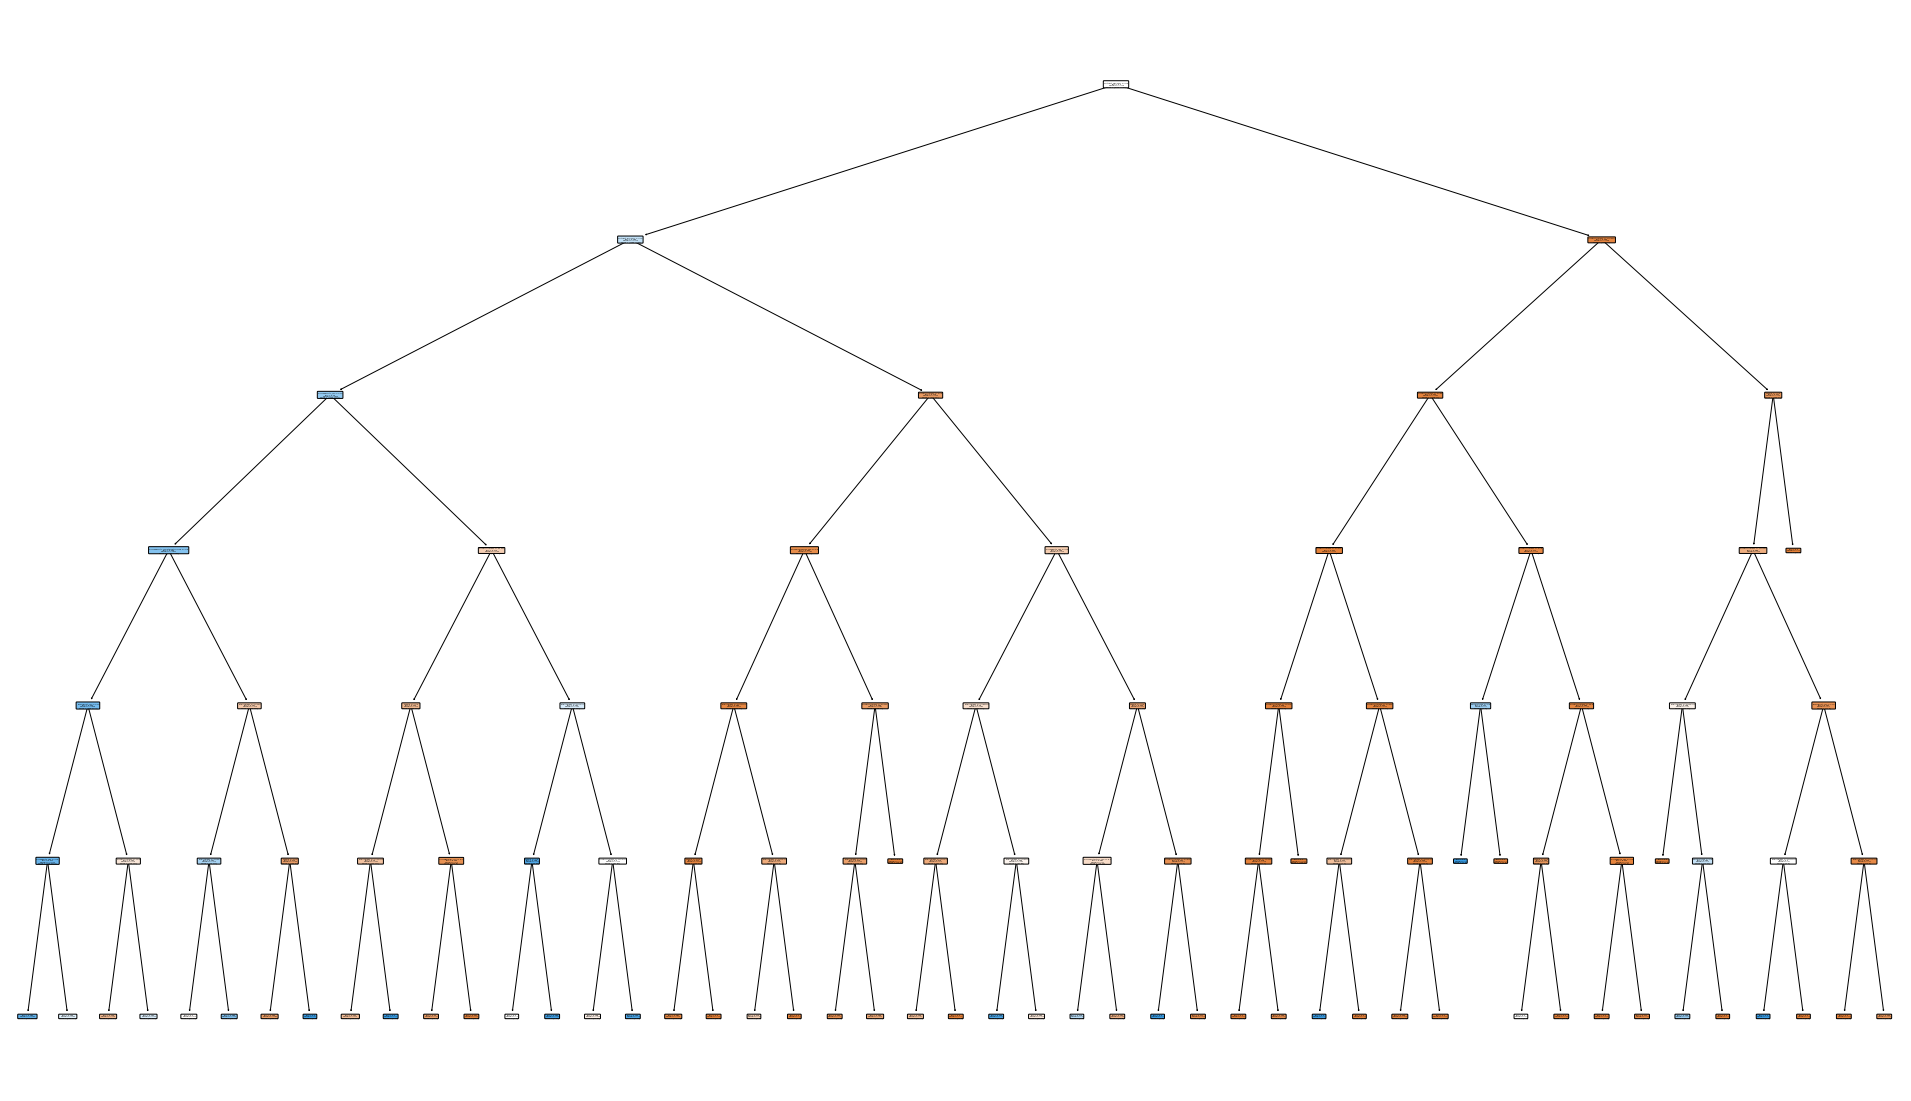

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

#### Feature importance

<BarContainer object of 22 artists>

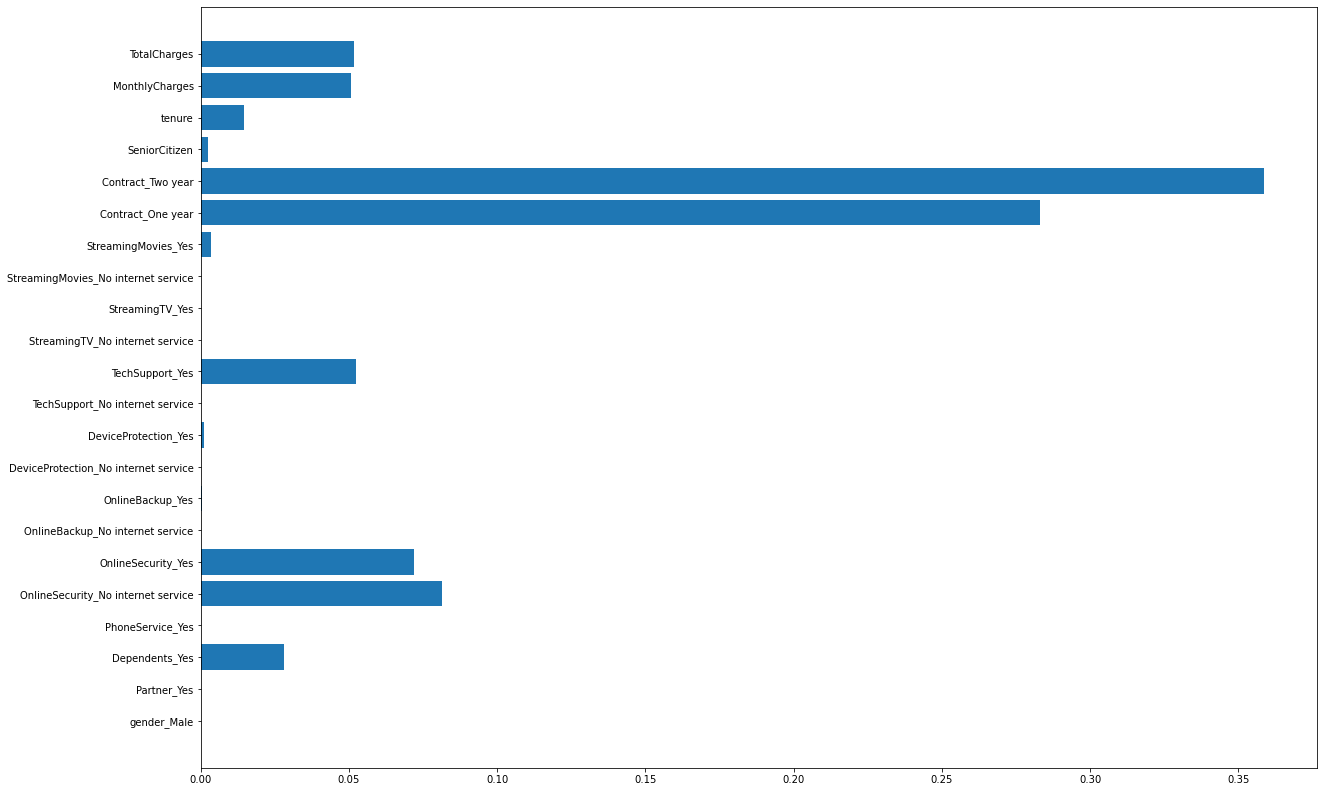

In [32]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

In [33]:
for k in range(3,10):
    
    models = {'k': [] }

    depth = DecisionTreeClassifier(max_depth=k)

    depth.fit(X_train_sm, y_train_sm)

    models['k'] = [k, depth]

    y_pred_train_classifier = depth.predict(X_train_sm)
    y_pred_test_classifier  = depth.predict(X_test)
    
    print(k, "Recall: ", recall_score(y_test, y_pred_test_classifier), "Accuracy: ", accuracy_score(y_test, y_pred_test_classifier), "Precision: ",precision_score(y_test, y_pred_test_classifier))


3 Recall:  0.7804878048780488 Accuracy:  0.6914339801230478 Precision:  0.459958932238193
4 Recall:  0.7735191637630662 Accuracy:  0.738760056791292 Precision:  0.5127020785219399
5 Recall:  0.7003484320557491 Accuracy:  0.7534311405584477 Precision:  0.5352862849533955
6 Recall:  0.7282229965156795 Accuracy:  0.7477520113582584 Precision:  0.5257861635220126
7 Recall:  0.7038327526132404 Accuracy:  0.7501183151916706 Precision:  0.5301837270341208
8 Recall:  0.7090592334494773 Accuracy:  0.7534311405584477 Precision:  0.5348226018396847
9 Recall:  0.7125435540069687 Accuracy:  0.7368670137245622 Precision:  0.51125


## Round-4-Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100,500],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt']
    ##'max_samples' : ['None', 0.5],
    ##'max_depth':[3,5,10],
    ## 'bootstrap':[True,False] 
    }
clf = RandomForestClassifier(random_state=100)

In [35]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)

In [36]:
grid_search.fit(X_train_sm,y_train_sm)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

#### Using .best parameters method to find our best hyperparameters

In [37]:
grid_search.best_params_ #To check the best set of parameters returned

{'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [38]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.320223,0.015793,0.017429,0.001197,sqrt,1,2,50,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.715268,0.768226,0.890646,0.888583,0.878955,0.828336,0.072763,11,0.998453,0.997937,0.996389,0.996217,0.996905,0.997180,0.000874
1,0.587866,0.011500,0.033701,0.003271,sqrt,1,2,100,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.716644,0.777166,0.888583,0.893398,0.872077,0.829574,0.070515,5,0.998624,0.998453,0.996733,0.997077,0.997421,0.997662,0.000750
2,2.908470,0.037826,0.180726,0.008914,sqrt,1,2,500,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.719395,0.774415,0.885832,0.889959,0.876204,0.829161,0.069522,8,0.998624,0.998453,0.996733,0.997077,0.997421,0.997662,0.000750
3,0.285033,0.003633,0.017315,0.003414,sqrt,1,4,50,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.722146,0.768913,0.892710,0.890646,0.878267,0.830536,0.071138,3,0.986761,0.979539,0.976960,0.974553,0.976272,0.978817,0.004283
4,0.576527,0.010815,0.031358,0.002379,sqrt,1,4,100,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.716644,0.777854,0.893398,0.886520,0.878267,0.830536,0.070867,3,0.987105,0.984869,0.979367,0.977132,0.978336,0.981362,0.003907
5,2.871741,0.100194,0.181780,0.019416,sqrt,1,4,500,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.720083,0.766850,0.889959,0.884457,0.875516,0.827373,0.070239,12,0.989340,0.985557,0.982634,0.980743,0.981259,0.983906,0.003190
6,0.262953,0.006905,0.018107,0.001784,sqrt,2,2,50,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.729711,0.768226,0.889959,0.885832,0.869326,0.828611,0.066518,9,0.952717,0.944635,0.937070,0.936210,0.937414,0.941609,0.006323
7,0.578511,0.059182,0.035757,0.008886,sqrt,2,2,100,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.734525,0.772352,0.889959,0.883081,0.873453,0.830674,0.064401,1,0.952545,0.944120,0.937414,0.937070,0.940165,0.942263,0.005728
8,2.627344,0.024492,0.148562,0.004094,sqrt,2,2,500,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.726272,0.773728,0.891334,0.883769,0.871389,0.829298,0.066768,6,0.953232,0.946011,0.940853,0.939305,0.939649,0.943810,0.005291
9,0.265779,0.006527,0.015727,0.001690,sqrt,2,4,50,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.729711,0.768226,0.889959,0.885832,0.869326,0.828611,0.066518,9,0.952717,0.944635,0.937070,0.936210,0.937414,0.941609,0.006323


### using the results from best parameters and applying on our model

In [40]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=0, max_features='sqrt', 
                             min_samples_leaf=2, min_samples_split=2, n_estimators=100)
cross_val_scores = cross_val_score(clf, X_train_sm, y_train_sm, cv=10)
print(np.mean(cross_val_scores))

0.8334250343878955


### Feature Importance

In [41]:
clf.fit( X_train_sm, y_train_sm)

RandomForestClassifier(max_features='sqrt', min_samples_leaf=2, random_state=0)

In [43]:
len(X_train_sm.columns)

22

In [44]:
feature_names = X_train_sm.columns
feature_names = list(feature_names)

In [45]:
df = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
df.columns = ['columns_name', 'score_feature_importance']
df.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
20,MonthlyCharges,0.149195
21,TotalCharges,0.147164
19,tenure,0.145919
17,Contract_Two year,0.082251
5,OnlineSecurity_Yes,0.071078
11,TechSupport_Yes,0.060700
16,Contract_One year,0.055821
2,Dependents_Yes,0.036531
1,Partner_Yes,0.031286
7,OnlineBackup_Yes,0.030489


In [46]:
clf.feature_importances_

array([0.02093282, 0.03128616, 0.03653144, 0.00832499, 0.01453089,
       0.07107759, 0.01904058, 0.03048891, 0.01196644, 0.0179972 ,
       0.0218602 , 0.06070041, 0.01733855, 0.0133271 , 0.01952532,
       0.01357023, 0.05582148, 0.08225106, 0.01115113, 0.1459187 ,
       0.14919453, 0.14716428])